Columns in dataset: Index(['Unix', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume BTC',
       'Volume USDT', 'tradecount'],
      dtype='object')
Mean Absolute Error: 381.59398733944954
Mean Squared Error: 447341.1219976334
R2 Score: 0.9991374098877961


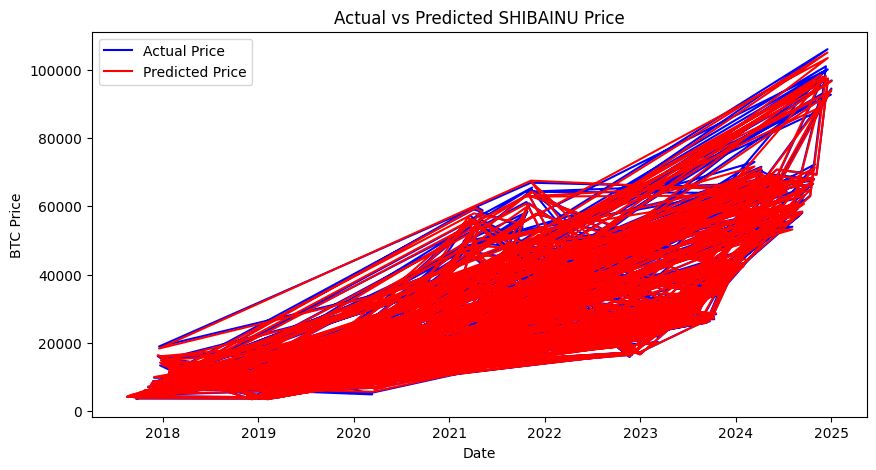

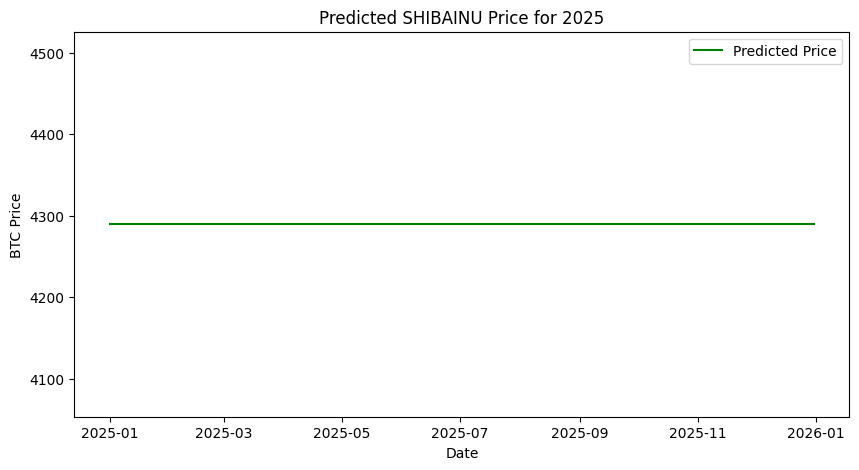

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Dataset (Replace with actual dataset path)
url = "https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_d.csv"
data = pd.read_csv(url, skiprows=1)

# Error: 'date' column not found in the dataset
# Solution: The correct column name is 'Date', so we need to rename it
print("Columns in dataset:", data.columns)

data.rename(columns={'Date': 'date'}, inplace=True)  # Renaming 'Date' to 'date' for consistency

data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Selecting Features and Target
features = ['Open', 'High', 'Low', 'Volume USDT']  # Adjusted column names based on dataset
target = 'Close'

X = data[features]
y = data[target]

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Visualization
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='red')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend()
plt.title('Actual vs Predicted BTC Price')
plt.show()

# Future Predictions (2025 January - December)
future_dates = pd.date_range(start='2025-01-01', end='2025-12-31')
future_features = pd.DataFrame(index=future_dates)

# Using last known values as a baseline for future predictions
future_features['Open'] = X['Open'].iloc[-1]  # Last known open price
future_features['High'] = X['High'].iloc[-1]
future_features['Low'] = X['Low'].iloc[-1]
future_features['Volume USDT'] = X['Volume USDT'].iloc[-1]

# Scale future data
future_features_scaled = scaler.transform(future_features)

# Predict future prices
future_predictions = model.predict(future_features_scaled)

# Visualization of Future Predictions
plt.figure(figsize=(10, 5))
plt.plot(future_dates, future_predictions, label='Predicted Price', color='green')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend()
plt.title('Predicted BTC Price for 2025')
plt.show()
